<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

#  K-Nearest Neighbors with `scikit-learn`

_Authors: Alex Sherman (DC)_

<a id="learning-objectives"></a>
## Learning Objectives

1. Utilize the KNN model on the iris data set.
2. Implement scikit-learn's KNN model.
3. Assess the fit of a KNN Model using scikit-learn.

### Lesson Guide
- [Learning Objectives](#learning-objectives)
- [Loading the Iris Data Set](#overview-of-the-iris-dataset)
	- [Terminology](#terminology)
- [Exercise: "Human Learning" With Iris Data](#exercise-human-learning-with-iris-data)
- [Human Learning on the Iris Data Set](#human-learning-on-the-iris-dataset)
- [K-Nearest Neighbors (KNN) Classification](#k-nearest-neighbors-knn-classification)
	- [Using the Train/Test Split Procedure (K=1)](#using-the-traintest-split-procedure-k)
- [Tuning a KNN Model](#tuning-a-knn-model)
	- [What Happens If We View the Accuracy of our Training Data?](#what-happen-if-we-view-the-accuracy-of-our-training-data)
	- [Training Error Versus Testing Error](#training-error-versus-testing-error)
- [Standardizing Features](#standardizing-features)
	- [Use `StandardScaler` to Standardize our Data](#use-standardscaler-to-standardize-our-data)
- [Comparing KNN With Other Models](#comparing-knn-with-other-models)

In this lesson, we will get an intuitive and practical feel for the **k-Nearest Neighbors** model. kNN is a **non-parametric model**. So, the model is not represented as an equation with parameters (e.g. the $\beta$ values in linear regression).

First, we will make a model by hand to classify iris flower data. Next, we will instantiate a kNN model.

> You may have heard of the clustering algorithm **k-Means Clustering**. These techniques have nothing in common, aside from both having a parameter k!

<a id="overview-of-the-iris-dataset"></a>
## Loading the Iris Data Set
---

#### Read the iris data into a pandas DataFrame, including column names.

In [1]:
# Read the iris data into a DataFrame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

data = './datasets/iris.data'
iris = pd.read_csv(data)

In [2]:
iris.head(7)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


<a id="terminology"></a>
### Terminology

- **150 observations** (n=150): Each observation is one iris flower.
- **Four features** (p=4): sepal length, sepal width, petal length, and petal width.
- **Response**: One of three possible iris species (setosa, versicolor, or virginica)
- **Classification problem** because response is categorical.

<a id="exercise-human-learning-with-iris-data"></a>
## Guided Practice: "Human Learning" With Iris Data

**Question:** Can we predict the species of an iris using petal and sepal measurements? Together, we will:

1. Read the iris data into a Pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.

**BONUS:** Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

#### Gather some basic information about the data.

In [3]:
# 150 observations, 5 columns (the 4 features & response)
iris.shape

(150, 5)

In [4]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
# Verify the basic stats look appropriate
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Test for imbalanced classes
iris.species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [7]:
# Verify we are not missing any data
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Use sorting, split-apply-combine, and/or visualization to look for differences between species.

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Sort the DataFrame by petal_width.
iris.sort_values(by='petal_width', ascending=True, inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa


In [10]:
# Sort the DataFrame by petal_width and display the NumPy array.
iris.sort_values(by='petal_width', ascending=True).values[0:5]

array([[5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa']], dtype=object)

#### Split-apply-combine: Explore the data while using a `groupby` on `'species'`.

In [11]:
# Mean of sepal_length, grouped by species.
iris.groupby(by='species', axis=0).sepal_length.mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [12]:
# Mean of all numeric columns, grouped by species.
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [13]:
# describe() of all numeric columns, grouped by species.
iris.groupby('species').describe()

petal_length                                               \
                       count   mean       std  min  25%   50%    75%  max   
species                                                                     
Iris-setosa             50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
Iris-versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
Iris-virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

                petal_width        ...  sepal_length      sepal_width         \
                      count   mean ...           75%  max       count   mean   
species                            ...                                         
Iris-setosa            50.0  0.244 ...           5.2  5.8        50.0  3.418   
Iris-versicolor        50.0  1.326 ...           6.3  7.0        50.0  2.770   
Iris-virginica         50.0  2.026 ...           6.9  7.9        50.0  2.974   

                                                        
                      std  min    25%  50%    75%  max  
species                                                 
Iris-setosa      0.381024  2.3  3.125  3.4  3.675  4.4  
Iris-versicolor  0.313798  2.0  2.525  2.8  3.000  3.4  
Iris-virginica   0.322497  2.2  2.800  3.0  3.175  3.8  

[3 rows x 32 columns]

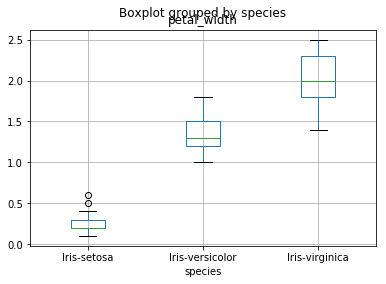

In [14]:
# Box plot of petal_width, grouped by species.
iris.boxplot(column='petal_width', by='species');

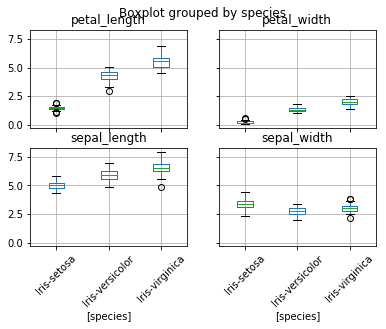

In [15]:
# Box plot of all numeric columns, grouped by species.
iris.boxplot(by='species', rot=45);

In [16]:
# Map species to a numeric value so that plots can be colored by species.
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Alternative method:
iris['species_num'] = iris.species.factorize()[0]

In [17]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
32,5.2,4.1,1.5,0.1,Iris-setosa,0
13,4.3,3.0,1.1,0.1,Iris-setosa,0
37,4.9,3.1,1.5,0.1,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,0


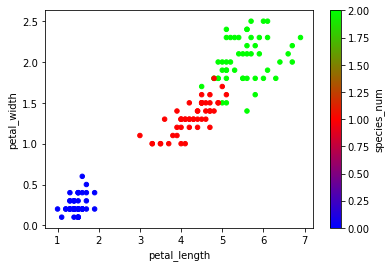

In [18]:
# Scatterplot of petal_length vs. petal_width, colored by species
fig, ax = plt.subplots()
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg', ax=ax);

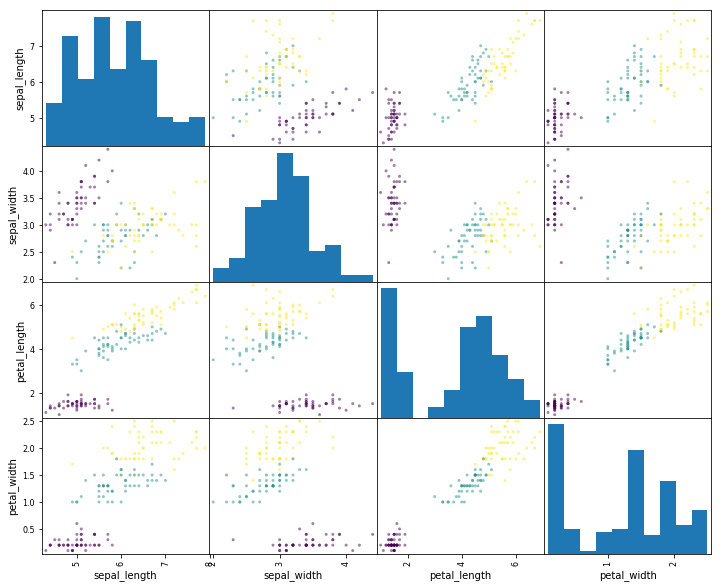

In [19]:
# Scatter matrix of all features, colored by species.
pd.plotting.scatter_matrix(iris.drop('species_num', axis=1), c=iris.species_num, figsize=(12, 10));

#### Paired Exercise: Using the graphs above, can you write down a set of rules that can accurately predict species based on iris measurements?

In [20]:
# Feel free to do more analysis if needed to make good rules!

#### Bonus: If you have time, try to implement these rules to make your own classifier!

Write a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

In [21]:
def predict_flower(df):
    preds = ['Iris-setosa'] * len(df)   # temporary!
    
    # for each row of df, make a prediction

    # add a column to the DataFrame with the predictions
    df['prediction'] = preds
    
    
predict_flower(iris)

In [22]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,prediction
32,5.2,4.1,1.5,0.1,Iris-setosa,0,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa,0,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa,0,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa,0,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa,0,Iris-setosa


In [23]:
# Let's see what percentage your manual classifier gets correct!
# 0.3333 means 1/3 are classified correctly

sum(iris.species == iris.prediction) / 150.

0.3333333333333333

<a id="human-learning-on-the-iris-dataset"></a>
## Human Learning on the Iris Data Set
---

How did we (as humans) predict the species of an iris?

1. We observed that the different species had (somewhat) dissimilar measurements.
2. We focused on features that seemed to correlate with the response.
3. We created a set of rules (using those features) to predict the species of an unknown iris.

We assumed that if an **unknown iris** had measurements similar to **previous irises**, then its species was most likely the same as those previous irises.

In [24]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

# Create a custom color map.
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [25]:
# Map each iris species to a number.
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

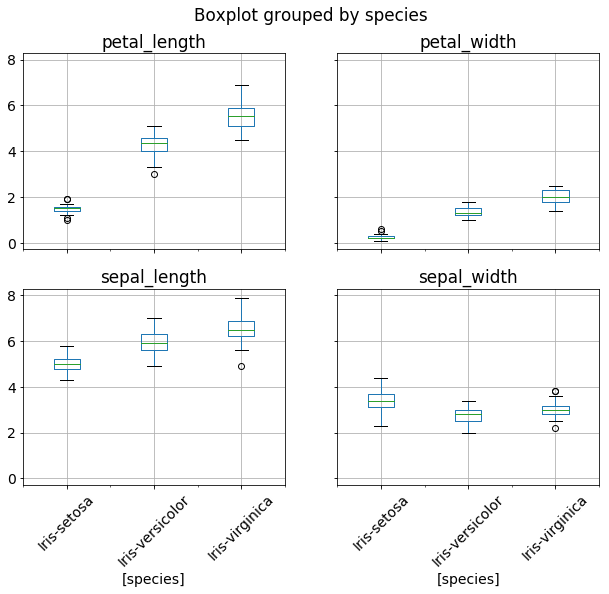

In [26]:
# Box plot of all numeric columns, grouped by species.
iris.drop('species_num', axis=1).boxplot(by='species', rot=45);

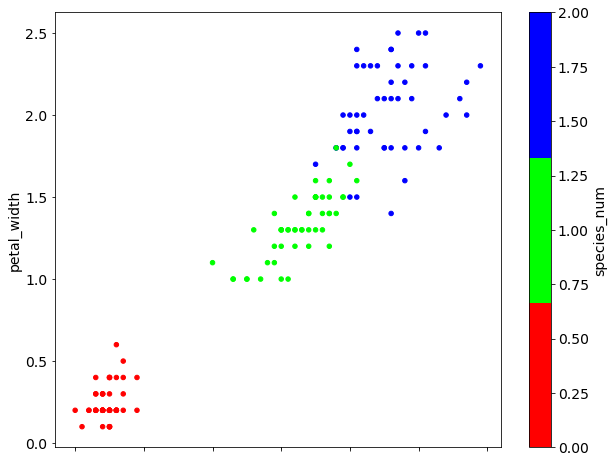

In [27]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES.
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold);

In [28]:
iris.prediction

32     Iris-setosa
13     Iris-setosa
37     Iris-setosa
9      Iris-setosa
12     Iris-setosa
34     Iris-setosa
0      Iris-setosa
27     Iris-setosa
28     Iris-setosa
29     Iris-setosa
30     Iris-setosa
33     Iris-setosa
36     Iris-setosa
38     Iris-setosa
39     Iris-setosa
42     Iris-setosa
46     Iris-setosa
47     Iris-setosa
48     Iris-setosa
49     Iris-setosa
25     Iris-setosa
24     Iris-setosa
35     Iris-setosa
3      Iris-setosa
2      Iris-setosa
7      Iris-setosa
8      Iris-setosa
10     Iris-setosa
4      Iris-setosa
11     Iris-setosa
          ...     
111    Iris-setosa
121    Iris-setosa
122    Iris-setosa
147    Iris-setosa
113    Iris-setosa
131    Iris-setosa
110    Iris-setosa
139    Iris-setosa
102    Iris-setosa
112    Iris-setosa
105    Iris-setosa
124    Iris-setosa
128    Iris-setosa
117    Iris-setosa
132    Iris-setosa
104    Iris-setosa
120    Iris-setosa
115    Iris-setosa
148    Iris-setosa
141    Iris-setosa
143    Iris-setosa
145    Iris-

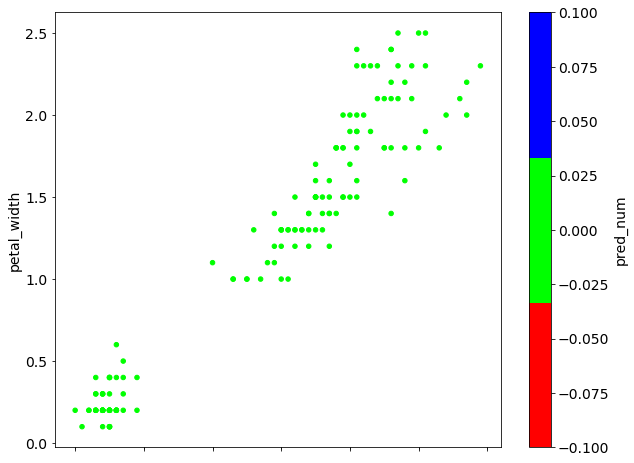

In [29]:
iris['pred_num'] = iris.prediction.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by PREDICTION.
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='pred_num', colormap=cmap_bold);

<a id="k-nearest-neighbors-knn-classification"></a>
## K-Nearest Neighbors (KNN) Classification
---

K-nearest neighbors classification is (as its name implies) a classification model that uses the "K" most similar observations in order to make a prediction.

KNN is a supervised learning method; therefore, the training data must have known target values.

The process of prediction using KNN is fairly straightforward:
>1. Pick a value for *K*.
>2. Search for the *K* observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
>3. Use the most popular response value from the *K* "nearest neighbors" as the predicted response value for the unknown iris.

The visualizations below shows how a given area can change in its prediction as *K* changes.

- Colored points represent true values and colored areas represent a **prediction space**. (This is called a Voronoi Diagram.)
- Each prediction space is where the majority of the *K* nearest points are the color of the space.
- To predict the class of a new point, we guess the class corresponding to the color of the space it lies in.

<a id="knn-classification-map-for-iris-k"></a>
### KNN Classification Map for Iris (*K*=1)

![1NN classification map](./assets/iris_01nn_map.png)

### KNN Classification Map for Iris (*K*=5)

![5NN classification map](./assets/iris_05nn_map.png)

### KNN Classification Map for Iris (*K*=15)

![15NN classification map](./assets/iris_15nn_map.png)

<a id="knn-classification-map-for-iris-k"></a>
### KNN Classification Map for Iris (*K*=50)

![50NN classification map](./assets/iris_50nn_map.png)

We can see that, as K increases, the classification spaces' borders become more distinct. However, you can also see that the spaces are not perfectly pure when it comes to the known elements within them.

**How are outliers affected by K?** As K increases, outliers are "smoothed out". Look at the above three plots and notice how outliers strongly affect the prediction space when K=1. When K=50, outliers no longer affect region boundaries. This is a classic bias-variance tradeoff -- with increasing K, the bias increases but the variance decreases.

**Question:** What's the "best" value for K in this case?

**Answer:** ...

## Guided Intro to KNN: NBA Position KNN Classifier

For the rest of the lesson, we will be using a dataset containing the 2015 season statistics for ~500 NBA players. This dataset leads to a nice choice of K, as we'll see below. The columns we'll use for features (and the target 'pos') are:


| Column | Meaning |
| ---    | ---     |
| pos | C: Center. F: Front. G: Guard |
| ast | Assists per game | 
| stl | Steals per game | 
| blk | Blocks per game |
| tov | Turnovers per game | 
| pf  | Personal fouls per game | 

For information about the other columns, see [this glossary](https://www.basketball-reference.com/about/glossary.html).

In [30]:
# Read the NBA data into a DataFrame.
import pandas as pd

path = './datasets/NBA_players_2015.csv'
nba = pd.read_csv(path, index_col=0)

In [31]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg_,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
season_end,,,,,,,,,,,,,,,,,,,,,
2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,0.469,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,0.474,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,0.550,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,0.432,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,0.426,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [32]:
# Map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [33]:
# Create feature matrix (X).
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

In [34]:
# Create response vector (y).
y = nba.pos_num

<a id="using-the-traintest-split-procedure-k"></a>
### Using the Train/Test Split Procedure (*K*=1)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Step 1: Split X and y into training and testing sets (using `random_state` for reproducibility).

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#### Step 2: Train the model on the training set (using K=1).

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Step 3: Test the model on the testing set and check the accuracy.

In [38]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6166666666666667


**Question:** If we had trained on the entire dataset and tested on the entire dataset, using 1-KNN what accuracy would we likely get? If the resulting accuracy is not this number, what must some data points look like?

**Answer:** ...

#### Repeating for K=50.

In [39]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.675


**Question:** Suppose we again train and test on the entire data set, but using 50-KNN. Would we expect the accuracy to be higher, lower, or the same as compared to 1-KNN?

**Answer:** ...

#### Comparing Testing Accuracy With Null Accuracy

Null accuracy is the accuracy that can be achieved by **always predicting the most frequent class**. For example, if most players are Centers, we would always predict Center.

The null accuracy is a benchmark against which you will want to measure every classification model.

#### Examine the class distribution from the training set.

Remember that we are comparing KNN to this simpler model. So, we must find the most frequent class **of the training set**.

In [40]:
most_freq_class = y_train.value_counts().index[0] # Recall: 'C':0, 'F':1, 'G':2

print(y_train.value_counts())
most_freq_class

1    150
2    140
0     68
Name: pos_num, dtype: int64


1

#### Compute null accuracy.

In [41]:
y_test.value_counts()[most_freq_class] / len(y_test)

0.4083333333333333

<a id="tuning-a-knn-model"></a>
## Tuning a KNN Model
---

In [42]:
# Instantiate the model (using the value K=5).
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model with data.
knn.fit(X, y)

# Store the predicted response values.
y_pred_class = knn.predict(X)
print(y_pred_class)

[1 1 0 1 2 0 1 1 1 1 1 1 1 0 1 1 1 1 2 0 1 1 1 0 2 1 1 1 2 2 0 1 1 0 2 1 2
 2 0 1 2 0 2 0 1 2 0 1 1 2 2 1 0 1 0 1 1 1 1 1 2 2 1 1 2 2 1 2 2 1 2 1 1 2
 2 2 2 0 1 2 2 1 2 0 1 2 0 2 2 1 2 2 2 2 1 1 2 0 2 1 2 1 1 2 2 0 1 1 1 1 1
 1 1 1 0 2 1 2 2 0 2 1 2 1 2 1 2 0 2 0 1 1 1 2 2 1 2 1 1 2 2 0 0 2 0 2 2 1
 2 2 2 0 1 2 2 1 1 1 0 2 1 1 2 0 1 1 1 1 1 2 0 1 0 1 1 2 0 1 1 2 2 2 1 1 1
 1 2 2 1 2 1 1 1 1 1 1 2 1 2 1 0 0 0 1 2 0 2 1 2 2 1 1 1 0 1 1 0 2 1 2 2 2
 2 0 2 0 1 1 0 2 1 1 1 1 0 2 1 2 1 1 1 1 0 0 1 2 0 0 2 1 1 2 1 2 2 0 1 2 0
 2 1 2 2 2 2 1 2 0 1 0 1 2 2 2 0 0 1 2 2 1 2 1 2 1 2 1 1 2 1 0 2 1 1 2 2 0
 2 1 0 1 1 2 2 1 2 2 1 1 2 2 2 2 1 0 1 2 1 2 1 0 1 1 0 2 2 1 2 2 2 1 0 1 1
 2 1 0 1 0 2 1 1 2 2 1 2 2 1 2 1 2 1 1 1 1 0 1 1 1 2 2 2 2 2 0 1 1 1 2 0 1
 2 2 1 2 1 2 1 2 2 2 2 1 1 1 1 1 0 2 1 2 2 0 2 1 2 1 1 2 2 1 2 2 1 1 1 1 0
 1 1 2 1 2 1 0 2 1 1 2 0 2 2 2 2 1 1 1 1 1 2 0 2 1 1 1 1 2 1 2 0 0 2 1 1 1
 2 2 1 2 2 1 1 2 1 1 2 2 0 1 1 2 2 1 2 2 2 2 2 1 1 2 1 1 2 2 1 1 0 0]


In [43]:
# Calculate predicted probabilities of class membership.
# Each row sums to one and contains the probabilities of the point being a 0-Center, 1-Front, 2-Guard.
knn.predict_proba(X)

array([[0. , 0.6, 0.4],
       [0. , 0.8, 0.2],
       [0.8, 0.2, 0. ],
       ...,
       [0. , 0.6, 0.4],
       [0.6, 0.4, 0. ],
       [0.6, 0.4, 0. ]])

<a id="what-happen-if-we-view-the-accuracy-of-our-training-data"></a>
### What Happens If We View the Accuracy of our Training Data?

In [44]:
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

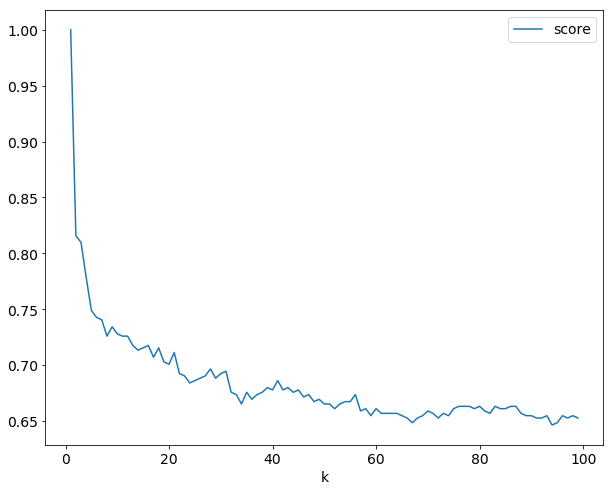

In [45]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

**Question:** As K increases, why does the accuracy fall?

**Answer:** ...

#### Searching for the "best" value of K.

In [46]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [47]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [48]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,training error,testing error
K,,
100,0.382845,0.366667
99,0.378661,0.358333
98,0.384937,0.366667
97,0.384937,0.366667
96,0.380753,0.366667


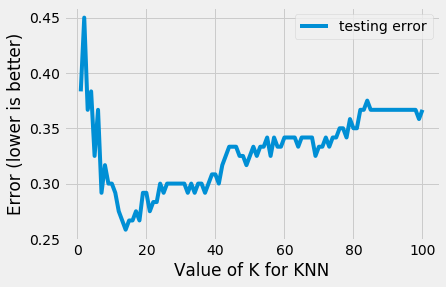

In [49]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [50]:
# Find the minimum testing error and the associated K value.
df.sort_values('testing error').head()

,training error,testing error
K,,
14,0.299163,0.258333
13,0.307531,0.266667
18,0.307531,0.266667
16,0.299163,0.266667
15,0.309623,0.266667


In [51]:
# Alternative method:
min(list(zip(testing_error, k_range)))

(0.2583333333333333, 14)

<a id="training-error-versus-testing-error"></a>
### Training Error Versus Testing Error

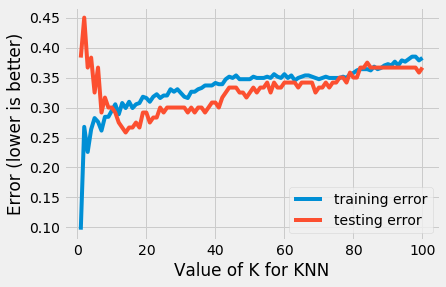

In [52]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

- **Training error** decreases as model complexity increases (lower value of K).
- **Testing error** is minimized at the optimum model complexity.

Evaluating the training and testing error is important. For example:

- If the training error is much lower than the test error, then our model is likely overfitting. 
- If the test error starts increasing as we vary a hyperparameter, we may be overfitting.
- If either error plateaus, our model is likely underfitting (not complex enough).

#### Making Predictions on Out-of-Sample Data

Given the statistics of a (truly) unknown NBA player, how do we predict his position?

In [53]:
# Instantiate the model with the best-known parameters.
knn = KNeighborsClassifier(n_neighbors=14)

# Re-train the model with X and y (not X_train and y_train). Why?
knn.fit(X, y)

# Make a prediction for an out-of-sample observation.
knn.predict(np.array([2, 1, 0, 1, 2]).reshape(1, -1))

array([2])

In [54]:
np.array([[2, 1], 0, 1, 2]).reshape(1, -1)

array([[list([2, 1]), 0, 1, 2]], dtype=object)

What could we conclude?

- When using KNN on this data set with these features, the **best value for K** is likely to be around 14.
- Given the statistics of an **unknown player**, we estimate that we would be able to correctly predict his position about 74% of the time.

<a id="standardizing-features"></a>
## Standardizing Features
---

There is one major issue that applies to many machine learning models: They are sensitive to feature scale. 

> KNN in particular is sensitive to feature scale because it (by default) uses the Euclidean distance metric. To determine closeness, Euclidean distance sums the square difference along each axis. So, if one axis has large differences and another has small differences, the former axis will contribute much more to the distance than the latter axis.

This means that it matters whether our feature are centered around zero and have similar variance to each other.

Unfortunately, most data does not naturally start at a mean of zero and a shared variance. Other models tend to struggle with scale as well, even linear regression, when you get into more advanced methods such as regularization.

Fortunately, this is an easy fix.

<a id="use-standardscaler-to-standardize-our-data"></a>
### Use `StandardScaler` to Standardize our Data

StandardScaler standardizes our data by subtracting the mean from each feature and dividing by its standard deviation.

#### Separate feature matrix and response for scikit-learn.

In [55]:
# Create feature matrix (X).
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']

X = nba[feature_cols]
y = nba.pos_num  # Create response vector (y).

#### Create the train/test split.

Notice that we create the train/test split first. This is because we will reveal information about our testing data if we standardize right away.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#### Instantiate and fit `StandardScaler`.

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Fit a KNN model and look at the testing error.
Can you find a number of neighbors that improves our results from before?

In [58]:
# Calculate testing error.
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(testing_error)

0.30833333333333335


<a id="comparing-knn-with-other-models"></a>
## Comparing KNN With Other Models
---

**Advantages of KNN:**

- It's simple to understand and explain.
- Model training is fast.
- It can be used for classification and regression (for regression, take the average value of the K nearest points!).
- Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

**Disadvantages of KNN:**

- It must store all of the training data.
- Its prediction phase can be slow when n is large.
- It is sensitive to irrelevant features.
- It is sensitive to the scale of the data.
- Accuracy is (generally) not competitive with the best supervised learning methods.